In [13]:
import zipfile
import os

# Define ZIP file and its extraction directory
archives = {
    "archive (4).zip": "unzipped_archive_4"
}

# Unzip the archive
for zip_path, extract_dir in archives.items():
    if os.path.exists(zip_path):
        os.makedirs(extract_dir, exist_ok=True)
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_dir)
        print(f"✅ Extracted '{zip_path}' to '{os.path.abspath(extract_dir)}'")
    else:
        print(f"❌ File not found: {zip_path}")


✅ Extracted 'archive (4).zip' to 'C:\Users\malyk\unzipped_archive_4'


In [14]:
import zipfile
import os

# Path to your ZIP file
zip_path = "archive (4).zip"

# Directory where files will be extracted
extract_dir = "unzipped_files_4"

# Create the directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Unzip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Files extracted to:", os.path.abspath(extract_dir))


Files extracted to: C:\Users\malyk\unzipped_files_4


In [15]:
import zipfile
import os
import pandas as pd

# Step 1: Unzip the archive
archives = {
    "archive (4).zip": "unzipped_archive_4"
}

for zip_path, extract_dir in archives.items():
    if os.path.exists(zip_path):
        os.makedirs(extract_dir, exist_ok=True)
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_dir)
        print(f"✅ Extracted '{zip_path}' to '{os.path.abspath(extract_dir)}'")
    else:
        print(f"❌ File not found: {zip_path}")

# Step 2: Find CSV files and print first 5 columns
for name, folder in archives.items():
    print(f"\n🔎 Checking folder: {folder}")
    files = os.listdir(folder)
    csv_files = [f for f in files if f.endswith(".csv")]
    
    if not csv_files:
        print("❌ No CSV files found.")
        continue

    for csv_file in csv_files:
        file_path = os.path.join(folder, csv_file)
        print(f"\n📄 File: {csv_file}")
        try:
            df = pd.read_csv(file_path)
            print(df.iloc[:, :5].head())  # first 5 columns and first 5 rows
        except Exception as e:
            print(f"⚠️ Could not read {csv_file}: {e}")


✅ Extracted 'archive (4).zip' to 'C:\Users\malyk\unzipped_archive_4'

🔎 Checking folder: unzipped_archive_4

📄 File: cleaned_cleaned_cleaned_social_media_usage.csv
  user_id        app  daily_minutes_spent  posts_per_day  likes_per_day
0     U_1  Pinterest                  288             16             94
1     U_2   Facebook                  192             14            117
2     U_3  Instagram                  351             13            120
3     U_4     TikTok                   21             20            117
4     U_5   LinkedIn                  241             16              9

📄 File: cleaned_cleaned_social_media_usage.csv
  user_id        app  daily_minutes_spent  posts_per_day  likes_per_day
0     U_1  Pinterest                  288             16             94
1     U_2   Facebook                  192             14            117
2     U_3  Instagram                  351             13            120
3     U_4     TikTok                   21             20            

In [16]:

import zipfile
import os
import pandas as pd

# Step 1: Unzip the archive (only archive (4).zip)
archives = {
    "archive (4).zip": "unzipped_archive_4"
}

for zip_path, extract_dir in archives.items():
    if os.path.exists(zip_path):
        os.makedirs(extract_dir, exist_ok=True)
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_dir)
        print(f"✅ Extracted '{zip_path}' to '{os.path.abspath(extract_dir)}'")
    else:
        print(f"❌ File not found: {zip_path}")

# Step 2: Clean each CSV in archive (4)
for name, folder in archives.items():
    print(f"\n🧹 Cleaning files in: {folder}")
    files = os.listdir(folder)
    csv_files = [f for f in files if f.endswith(".csv")]

    if not csv_files:
        print("❌ No CSV files found.")
        continue

    for csv_file in csv_files:
        file_path = os.path.join(folder, csv_file)
        print(f"\n📄 Cleaning file: {csv_file}")
        try:
            df = pd.read_csv(file_path)

            # Drop completely empty rows or columns
            df.dropna(axis=0, how='all', inplace=True)
            df.dropna(axis=1, how='all', inplace=True)

            # Clean column names
            df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

            # Drop duplicate rows
            df.drop_duplicates(inplace=True)

            # Try converting columns to appropriate data types
            df = df.convert_dtypes()

            # Handle remaining missing values: fill with "unknown" for object cols, median/mean for numerics
            for col in df.columns:
                if df[col].isna().sum() > 0:
                    if df[col].dtype == "string" or df[col].dtype == "object":
                        df[col].fillna("unknown", inplace=True)
                    elif pd.api.types.is_numeric_dtype(df[col]):
                        df[col].fillna(df[col].median(), inplace=True)

            # Save cleaned file
            cleaned_name = f"cleaned_{csv_file}"
            cleaned_path = os.path.join(folder, cleaned_name)
            df.to_csv(cleaned_path, index=False)
            print(f"✅ Saved cleaned file as: {cleaned_path}")

        except Exception as e:
            print(f"⚠️ Could not process {csv_file}: {e}")


✅ Extracted 'archive (4).zip' to 'C:\Users\malyk\unzipped_archive_4'

🧹 Cleaning files in: unzipped_archive_4

📄 Cleaning file: cleaned_cleaned_cleaned_social_media_usage.csv
✅ Saved cleaned file as: unzipped_archive_4\cleaned_cleaned_cleaned_cleaned_social_media_usage.csv

📄 Cleaning file: cleaned_cleaned_social_media_usage.csv
✅ Saved cleaned file as: unzipped_archive_4\cleaned_cleaned_cleaned_social_media_usage.csv

📄 Cleaning file: cleaned_social_media_usage.csv
✅ Saved cleaned file as: unzipped_archive_4\cleaned_cleaned_social_media_usage.csv

📄 Cleaning file: social_media_usage.csv
✅ Saved cleaned file as: unzipped_archive_4\cleaned_social_media_usage.csv


In [35]:
import zipfile
import os

# Path to your ZIP file
zip_path = "archive (4).zip"

# Directory where files will be extracted
extract_dir = "unzipped_files"

# Create the directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Unzip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Files extracted to:", os.path.abspath(extract_dir))


Files extracted to: C:\Users\malyk\unzipped_files


In [17]:
print(df.columns)

Index(['user_id', 'app', 'daily_minutes_spent', 'posts_per_day',
       'likes_per_day', 'follows_per_day'],
      dtype='object')


In [18]:
df.describe()

,daily_minutes_spent,posts_per_day,likes_per_day,follows_per_day
count,1000.0,1000.0,1000.0,1000.0
mean,247.368,10.269,94.682,24.698
std,146.371921,6.121774,57.560943,14.842948
min,5.0,0.0,0.0,0.0
25%,112.75,5.0,44.75,12.0
50%,246.0,10.0,94.0,24.0
75%,380.5,16.0,142.0,38.0
max,500.0,20.0,200.0,50.0


In [29]:
import os
import pandas as pd

def analyze_dataset(df):
    print(f"Number of data points (rows): {df.shape[0]}")
    print(f"Number of features (columns): {df.shape[1]}")

    print("\nChecking for missing values...")
    total_missing = df.isna().sum().sum()
    if total_missing == 0:
        print("No missing values found.")
    else:
        print(f"Total missing values in dataset: {total_missing}")

    def detect_outliers(series):
        if pd.api.types.is_numeric_dtype(series):
            Q1 = series.quantile(0.25)
            Q3 = series.quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = series[(series < lower_bound) | (series > upper_bound)]
            return "Yes" if len(outliers) > 0 else "No"
        else:
            return "N/A"

    rows = []
    for col in df.columns:
        series = df[col]
        n_missing = series.isna().sum()

        if pd.api.types.is_numeric_dtype(series):
            f_type = "Numerical"
            values_desc = f"{series.min()} to {series.max()}"
            outlier = detect_outliers(series.dropna())
        else:
            f_type = "Categorical"
            unique_vals = sorted(series.dropna().unique())
            values_desc = ", ".join(map(str, unique_vals))
            outlier = "N/A"

        rows.append({
            "Feature": col,
            "Type": f_type,
            "Values": values_desc,
            "Missing Values": n_missing,
            "Outliers (IQR method)": outlier
        })

    print("\nDefinition of outlier:")
    print("Values outside 1.5 times the interquartile range (IQR) below Q1 or above Q3.")

    summary_df = pd.DataFrame(rows)
    return summary_df

# Folder where archives are extracted
folder = "unzipped_archive_4"

# Find all CSV files recursively
csv_files = []
for root, dirs, files in os.walk(folder):
    for file in files:
        if file.endswith(".csv"):
            full_path = os.path.join(root, file)
            csv_files.append(full_path)

if not csv_files:
    print(f"No CSV files found inside '{folder}' or its subfolders.")
else:
    print(f"CSV files found ({len(csv_files)}):")
    for f in csv_files:
        print(f" - {f}")

    # Load the first CSV file found
    file_path = csv_files[0]
    print(f"\nLoading first CSV file: {file_path}")

    df = pd.read_csv(file_path)
    print(f"Loaded dataset with shape: {df.shape}")

    summary = analyze_dataset(df)
    print(summary)


CSV files found (5):
 - unzipped_archive_4\cleaned_cleaned_cleaned_cleaned_social_media_usage.csv
 - unzipped_archive_4\cleaned_cleaned_cleaned_social_media_usage.csv
 - unzipped_archive_4\cleaned_cleaned_social_media_usage.csv
 - unzipped_archive_4\cleaned_social_media_usage.csv
 - unzipped_archive_4\social_media_usage.csv

Loading first CSV file: unzipped_archive_4\cleaned_cleaned_cleaned_cleaned_social_media_usage.csv
Loaded dataset with shape: (1000, 6)
Number of data points (rows): 1000
Number of features (columns): 6

Checking for missing values...
No missing values found.

Definition of outlier:
Values outside 1.5 times the interquartile range (IQR) below Q1 or above Q3.
               Feature         Type  \
0              user_id  Categorical   
1                  app  Categorical   
2  daily_minutes_spent    Numerical   
3        posts_per_day    Numerical   
4        likes_per_day    Numerical   
5      follows_per_day    Numerical   

                                       

In [40]:
import os
import pandas as pd

folder = "unzipped_archive_4"
filename = "social_media_usage.csv"  # lowercase, no spaces
file_path = os.path.join(folder, filename)

if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print(f"Loaded '{filename}' with shape {df.shape}")
    print(f"Columns:\n{df.columns.tolist()}")
else:
    print(f"Error: File does not exist at path: {file_path}")



Loaded 'social_media_usage.csv' with shape (1000, 6)
Columns:
['User_ID', 'App', 'Daily_Minutes_Spent', 'Posts_Per_Day', 'Likes_Per_Day', 'Follows_Per_Day']


In [42]:
import os
import pandas as pd

folder = "unzipped_archive_4"
filename = "social_media_usage.csv"
file_path = os.path.join(folder, filename)

# Load dataset
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print(f"Loaded dataset with shape: {df.shape}")
else:
    raise FileNotFoundError(f"File not found: {file_path}")

# Cleaning
# 1. Drop empty rows/columns
df.dropna(axis=0, how='all', inplace=True)
df.dropna(axis=1, how='all', inplace=True)

# 2. Strip whitespace and lowercase column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# 3. Drop duplicate rows
df.drop_duplicates(inplace=True)

# 4. Fill missing values
for col in df.columns:
    if df[col].isna().sum() > 0:
        if pd.api.types.is_numeric_dtype(df[col]):
            df[col].fillna(df[col].median(), inplace=True)
        else:
            df[col].fillna("unknown", inplace=True)

print("\nData cleaning completed.")
print(f"Missing values per column:\n{df.isna().sum()}")


Loaded dataset with shape: (1000, 6)

Data cleaning completed.
Missing values per column:
user_id                0
app                    0
daily_minutes_spent    0
posts_per_day          0
likes_per_day          0
follows_per_day        0
dtype: int64


In [44]:
print("\nBasic Dataset Info:")
print(df.info())

print("\nBasic Descriptive Stats for Numerical Columns:")
print(df.describe())

print("\nValue counts for categorical columns:")
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
for col in categorical_cols:
    print(f"\n--- {col} ---")
    print(df[col].value_counts().head(10))



Basic Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              1000 non-null   object
 1   app                  1000 non-null   object
 2   daily_minutes_spent  1000 non-null   int64 
 3   posts_per_day        1000 non-null   int64 
 4   likes_per_day        1000 non-null   int64 
 5   follows_per_day      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB
None

Basic Descriptive Stats for Numerical Columns:
       daily_minutes_spent  posts_per_day  likes_per_day  follows_per_day
count          1000.000000    1000.000000    1000.000000      1000.000000
mean            247.368000      10.269000      94.682000        24.698000
std             146.371921       6.121774      57.560943        14.842948
min               5.000000       0.000000       0.000000         0.000000
25%     

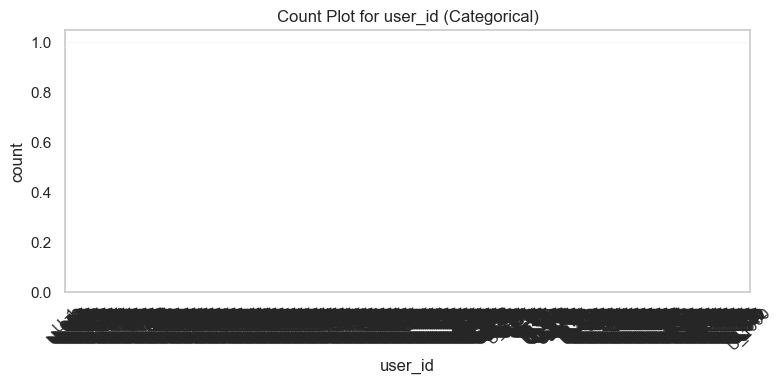

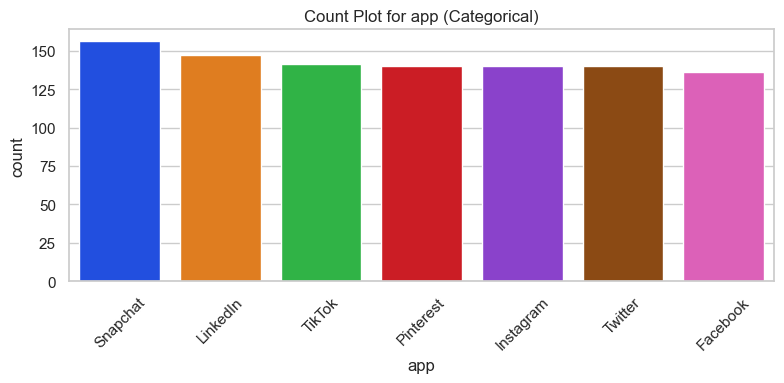

C:\Users\malyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


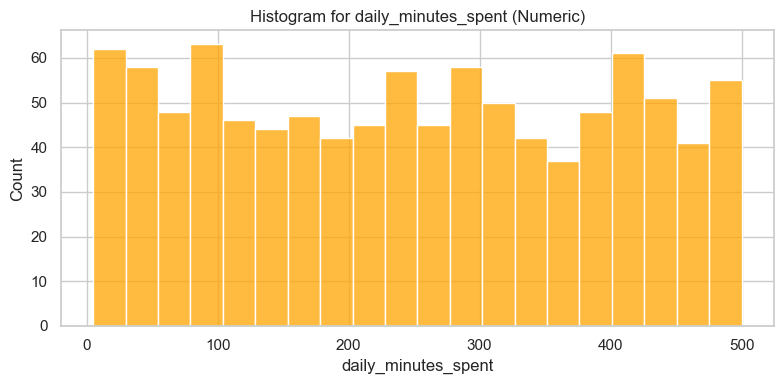

C:\Users\malyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


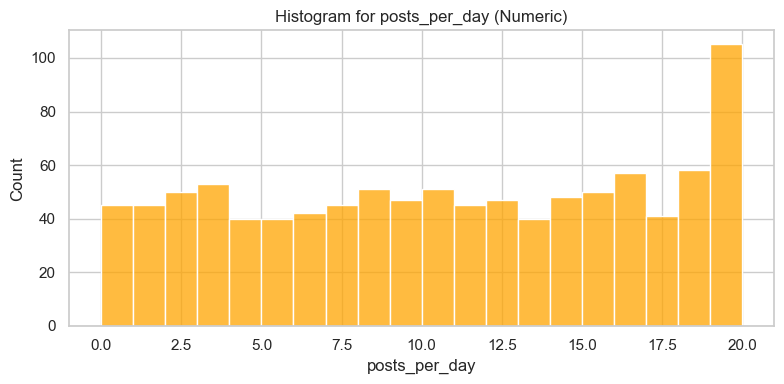

C:\Users\malyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


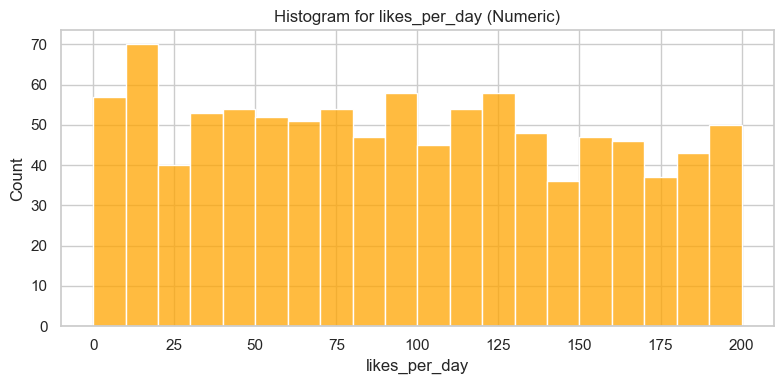

C:\Users\malyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


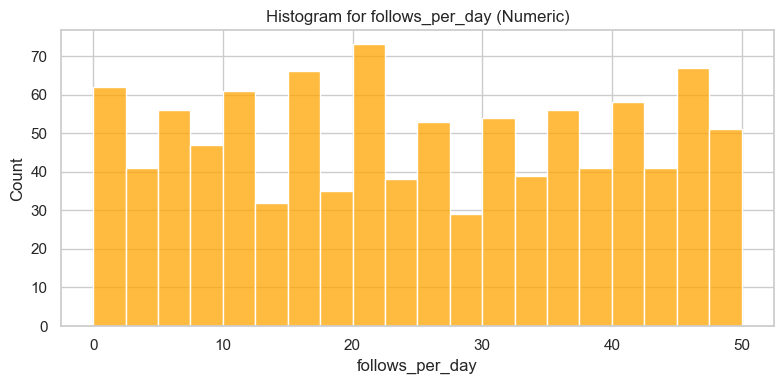

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_bars(df):
    sns.set(style="whitegrid", palette="bright")  # brighter palette
    
    for col in df.columns:
        plt.figure(figsize=(8, 4))
        if pd.api.types.is_numeric_dtype(df[col]):
            unique_vals = df[col].nunique()
            if unique_vals <= 20:
                # Few unique numeric values: count plot
                sns.countplot(data=df, x=col, palette="bright")
                plt.title(f'Count Plot for {col} (Numeric, Few Unique Values)')
                plt.xticks(rotation=45)
            else:
                # Many unique numeric values: histogram
                sns.histplot(df[col].dropna(), bins=20, kde=False, color='orange')
                plt.title(f'Histogram for {col} (Numeric)')
        else:
            sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="bright")
            plt.title(f'Count Plot for {col} (Categorical)')
            plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

plot_feature_bars(df)


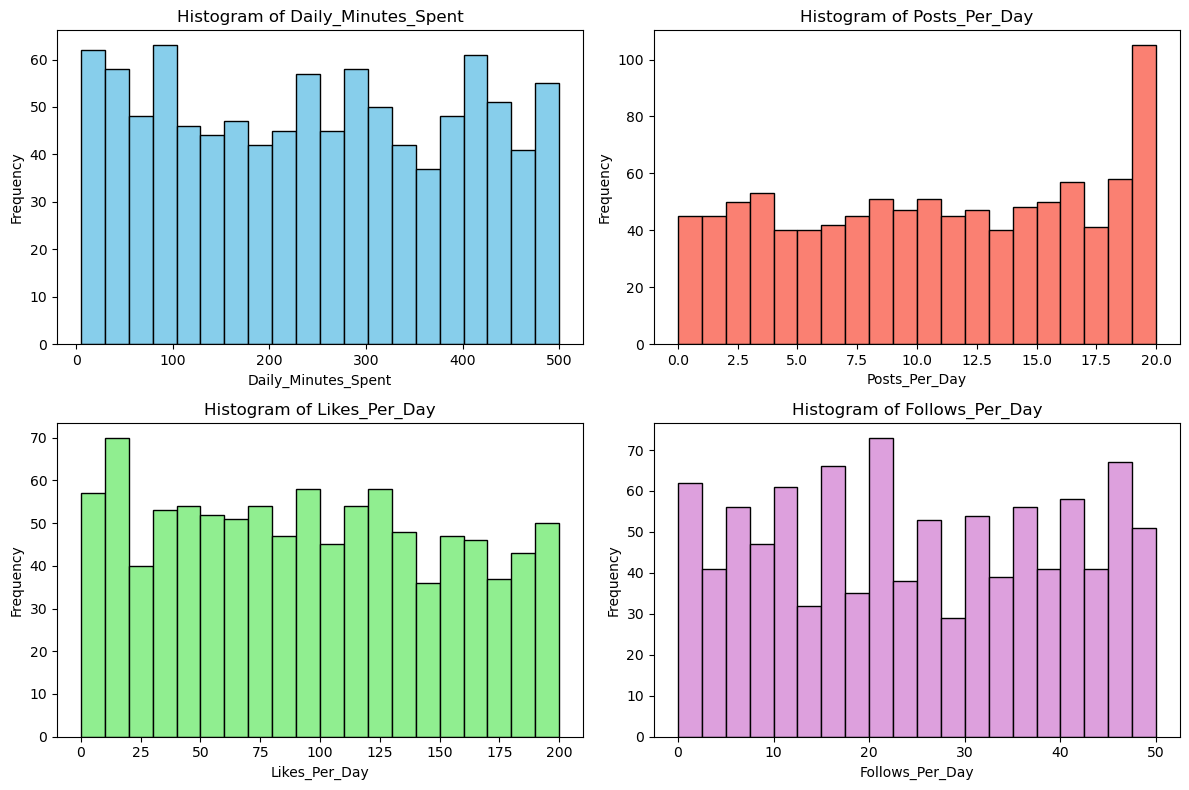

In [5]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Load the dataset
folder = "unzipped_archive_4"
filename = "social_media_usage.csv"
file_path = os.path.join(folder, filename)

if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    
    # Identify numeric columns (excluding 'User_ID')
    numeric_cols = ['Daily_Minutes_Spent', 'Posts_Per_Day', 'Likes_Per_Day', 'Follows_Per_Day']

    # Define distinct colors
    colors = ['skyblue', 'salmon', 'lightgreen', 'plum']

    # Plot histograms
    plt.figure(figsize=(12, 8))
    for i, col in enumerate(numeric_cols):
        plt.subplot(2, 2, i + 1)
        color = colors[i % len(colors)]
        plt.hist(df[col].dropna(), bins=20, color=color, edgecolor='black')
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

else:
    print(f"File not found: {file_path}")


C:\Users\malyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


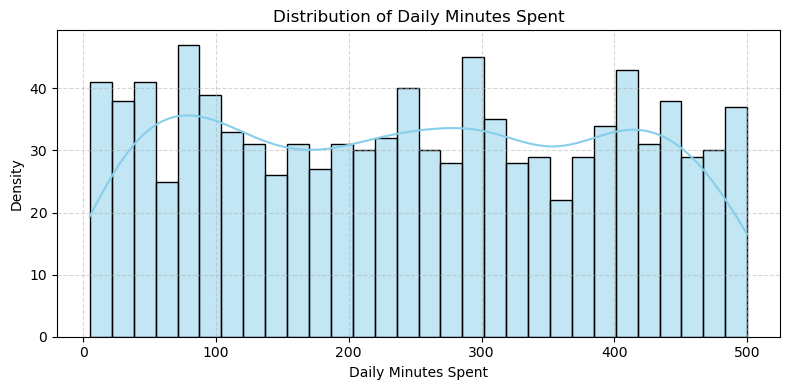

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot: Daily Minutes Spent
data = df['Daily_Minutes_Spent'].dropna()

plt.figure(figsize=(8, 4))
sns.histplot(data, bins=30, kde=True, color='skyblue')
plt.title('Distribution of Daily Minutes Spent')
plt.xlabel('Daily Minutes Spent')
plt.ylabel('Density')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()




In [25]:
print(df.columns.tolist())


['Student_ID', 'Age', 'Gender', 'Academic_Level', 'Country', 'Avg_Daily_Usage_Hours', 'Most_Used_Platform', 'Affects_Academic_Performance', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Relationship_Status', 'Conflicts_Over_Social_Media', 'Addicted_Score']


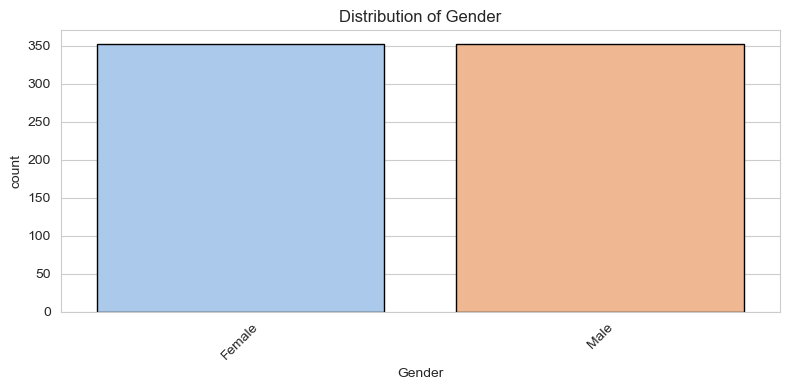

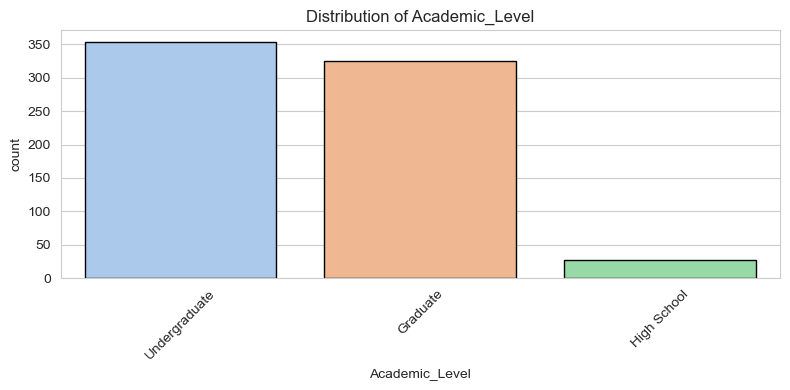

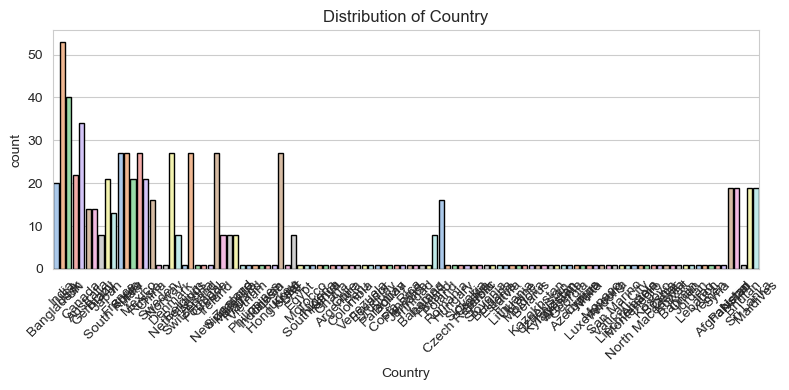

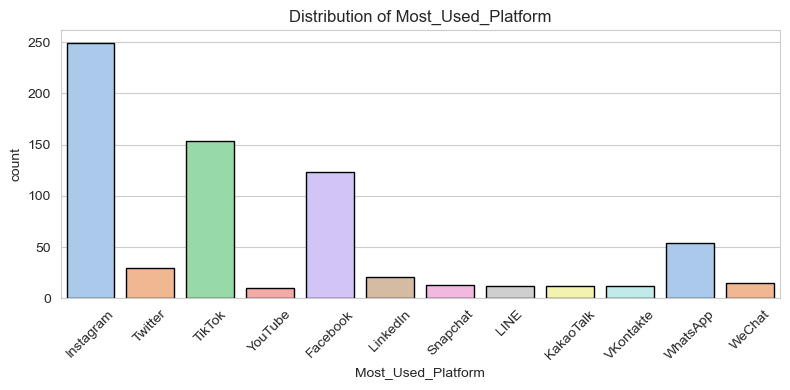

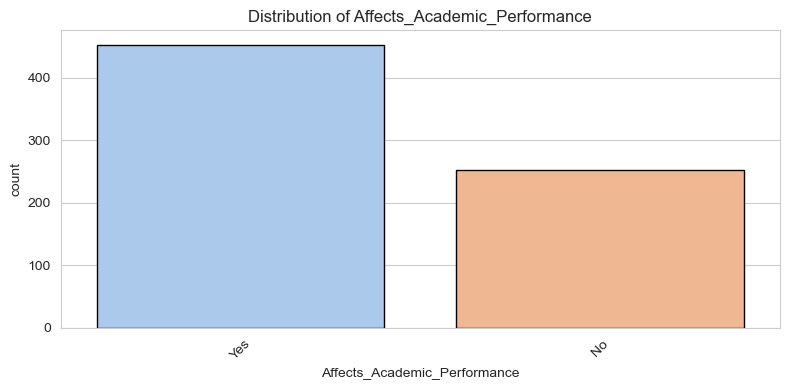

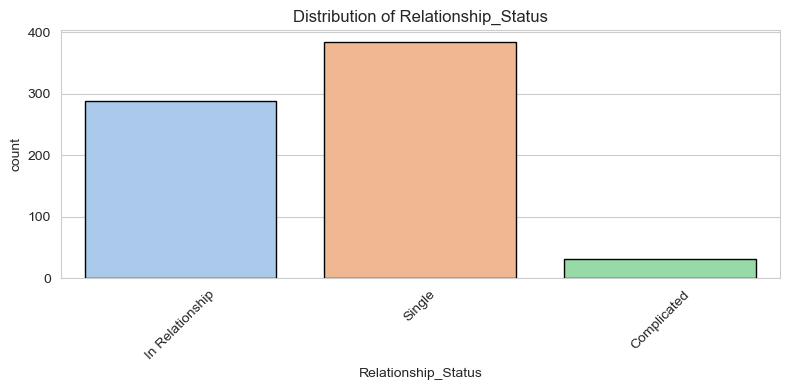

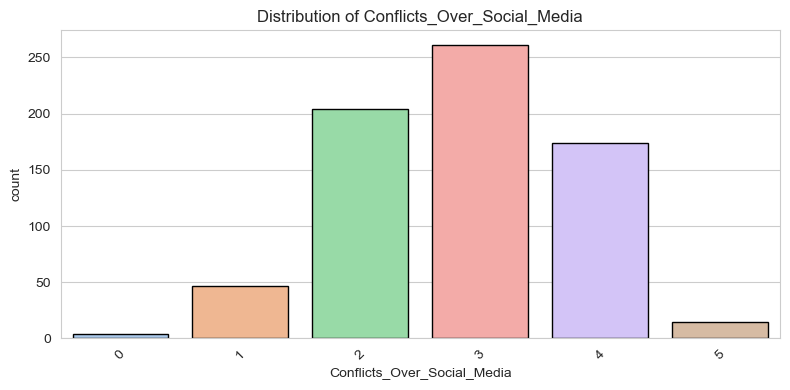

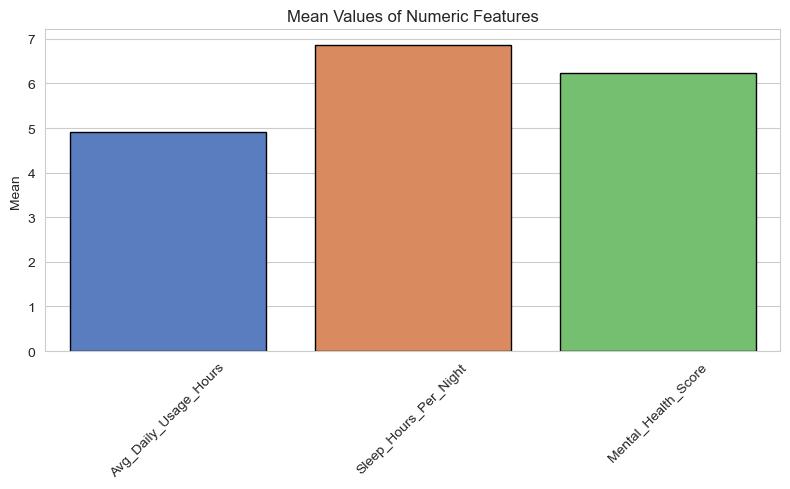

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Clean column names (in case of extra whitespace)
df.columns = df.columns.str.strip()

# Define categorical and numeric columns manually
categorical_cols = ['Gender', 'Academic_Level', 'Country', 'Most_Used_Platform',
                    'Affects_Academic_Performance', 'Relationship_Status', 'Conflicts_Over_Social_Media']

numeric_cols = ['Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score']

# Set up style
sns.set_style("whitegrid")

# Plot categorical value counts
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, palette='pastel', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot numeric column means
means = df[numeric_cols].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=means.index, y=means.values, palette='muted', edgecolor='black')
plt.title('Mean Values of Numeric Features')
plt.ylabel('Mean')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





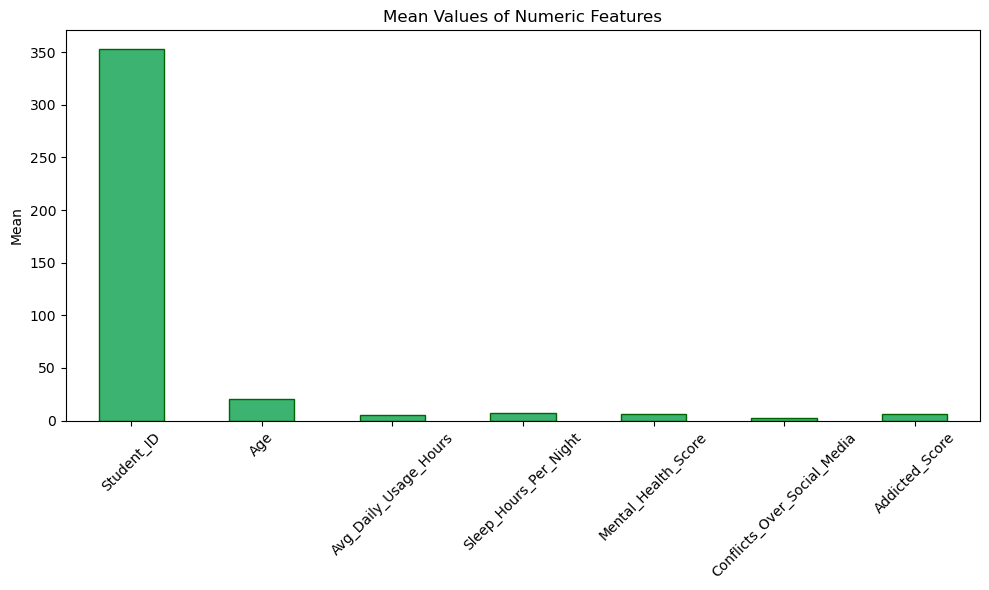

In [15]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Load the dataset
folder = "unzipped_archive_3"
filename = "Students Social Media Addiction.csv"
file_path = os.path.join(folder, filename)

if os.path.exists(file_path):
    df = pd.read_csv(file_path)

    # Select numeric columns (remove ID)
    numeric_cols = df.select_dtypes(include='number').columns.tolist()
    if 'student_id' in numeric_cols:
        numeric_cols.remove('student_id')

    # Calculate means
    means = df[numeric_cols].mean()

    # Plot mean values as bar plot
    plt.figure(figsize=(10, 6))
    means.plot(kind='bar', color='mediumseagreen', edgecolor='darkgreen')
    plt.title('Mean Values of Numeric Features')
    plt.ylabel('Mean')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

else:
    print(f"File not found: {file_path}")


✅ Loaded dataset: (1000, 6)

📊 Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              1000 non-null   object
 1   app                  1000 non-null   object
 2   daily_minutes_spent  1000 non-null   int64 
 3   posts_per_day        1000 non-null   int64 
 4   likes_per_day        1000 non-null   int64 
 5   follows_per_day      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB
None

🧮 Descriptive Statistics:
       user_id       app  daily_minutes_spent  posts_per_day  likes_per_day  \
count     1000      1000          1000.000000    1000.000000    1000.000000   
unique    1000         7                  NaN            NaN            NaN   
top        U_1  Snapchat                  NaN            NaN            NaN   
freq         1       156                  NaN           

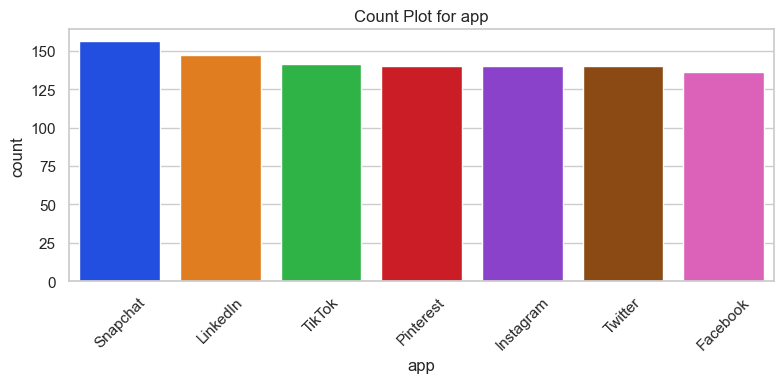

C:\Users\malyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


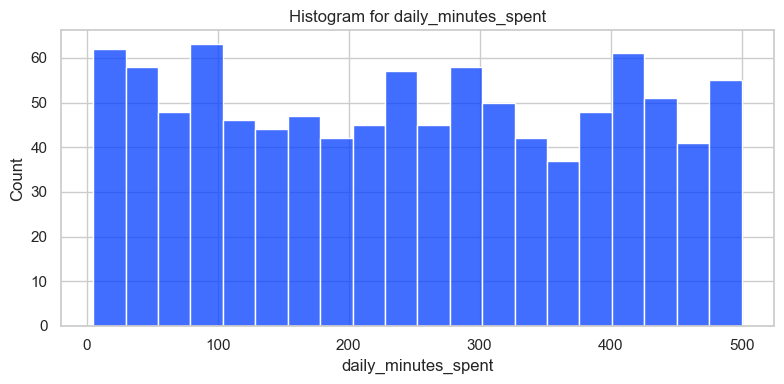

C:\Users\malyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


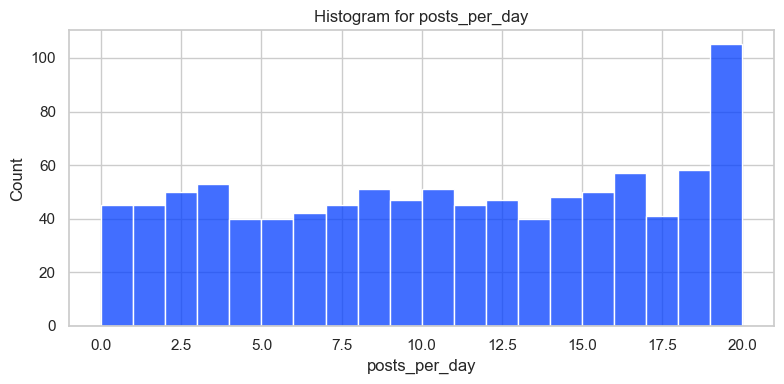

C:\Users\malyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


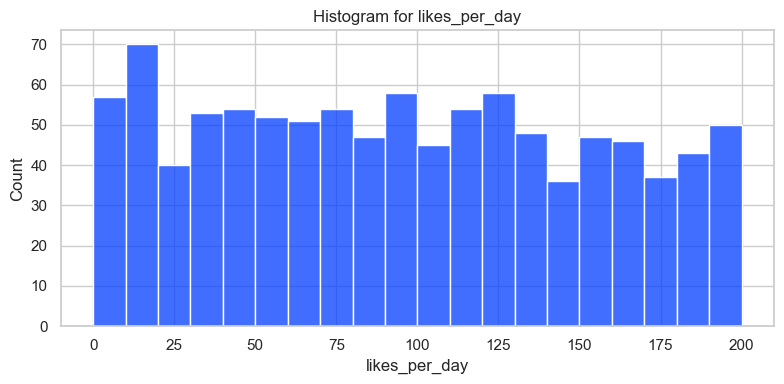

C:\Users\malyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


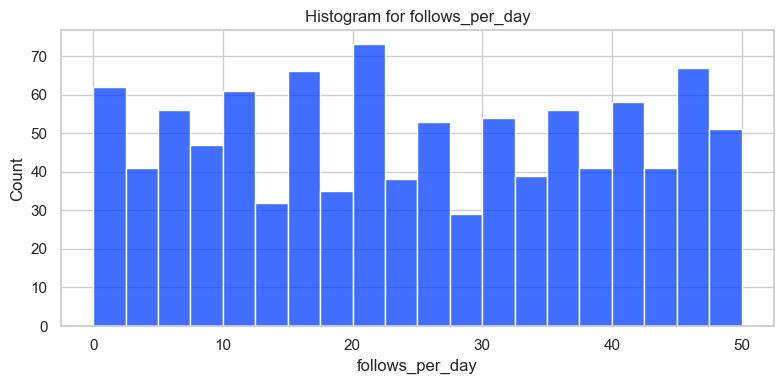

In [50]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
folder = "unzipped_archive_4"
filename = "social_media_usage.csv"
file_path = os.path.join(folder, filename)

# Load the data
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found: {file_path}")
df = pd.read_csv(file_path)
print(f"✅ Loaded dataset: {df.shape}")

# Clean data
df.dropna(axis=0, how='all', inplace=True)
df.dropna(axis=1, how='all', inplace=True)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.drop_duplicates(inplace=True)

for col in df.columns:
    if df[col].isna().sum() > 0:
        if df[col].dtype == "object" or df[col].dtype.name == "string":
            df[col].fillna("unknown", inplace=True)
        elif pd.api.types.is_numeric_dtype(df[col]):
            df[col].fillna(df[col].median(), inplace=True)

# Summary analysis
print("\n📊 Dataset Summary:")
print(df.info())
print("\n🧮 Descriptive Statistics:")
print(df.describe(include='all'))

# Visualization (excluding 'user_id')
sns.set(style="whitegrid", palette="bright")
exclude = ['user_id']
for col in df.columns:
    if col in exclude:
        continue

    plt.figure(figsize=(8, 4))
    if pd.api.types.is_numeric_dtype(df[col]):
        if df[col].nunique() <= 20:
            sns.countplot(data=df, x=col)
            plt.title(f'Count Plot for {col}')
        else:
            sns.histplot(df[col], bins=20, kde=False)
            plt.title(f'Histogram for {col}')
    else:
        sns.countplot(data=df, x=col, order=df[col].value_counts().index)
        plt.title(f'Count Plot for {col}')
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


C:\Users\malyk\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


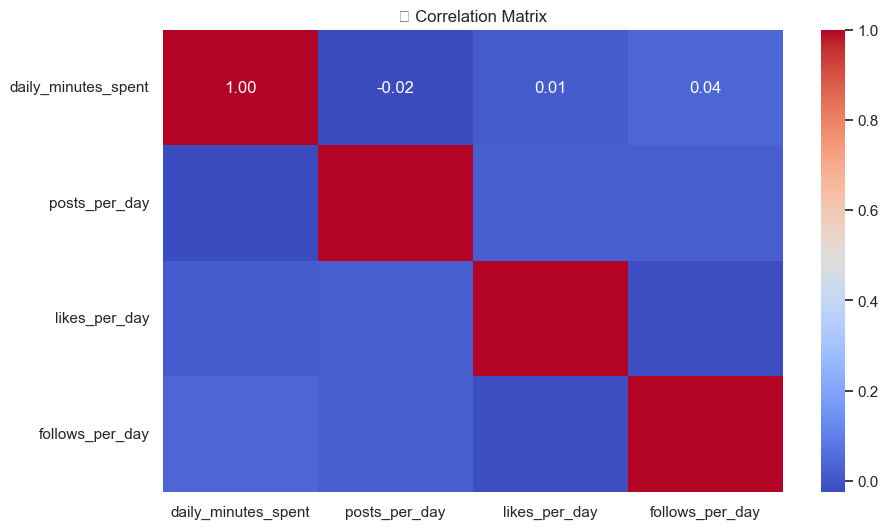

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns (exclude 'user_id')
numerical_cols = df.select_dtypes(include='number').drop(columns='user_id', errors='ignore')

# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("📈 Correlation Matrix")
plt.show()


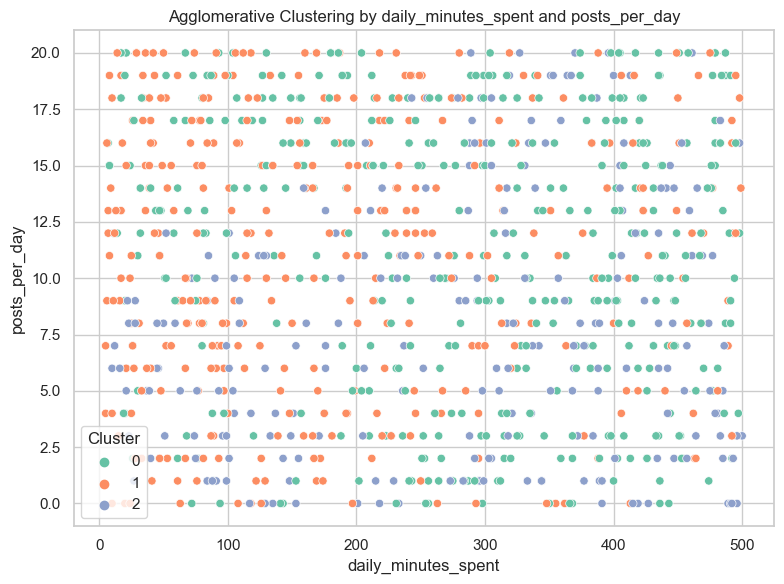

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

# Step 1: Select and scale numeric features (drop 'user_id' if present)
numerical_cols = df.select_dtypes(include='number').drop(columns='user_id', errors='ignore')
X_scaled = StandardScaler().fit_transform(numerical_cols)

# Step 2: Perform Agglomerative Clustering
clustering = AgglomerativeClustering(n_clusters=3)
df['cluster'] = clustering.fit_predict(X_scaled)

# Step 3: Plot clusters using first two numeric features (safe column access)
col1, col2 = numerical_cols.columns[0], numerical_cols.columns[1]

# Step 4: Scatter plot of clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df[col1], y=df[col2], hue=df['cluster'], palette='Set2')
plt.title(f"Agglomerative Clustering by {col1} and {col2}")
plt.xlabel(col1)
plt.ylabel(col2)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()



Accuracy: 0.17
              precision    recall  f1-score   support

    Facebook       0.16      0.39      0.23        23
   Instagram       0.17      0.27      0.21        26
    LinkedIn       0.16      0.14      0.15        21
   Pinterest       0.17      0.20      0.18        25
    Snapchat       0.25      0.14      0.18        37
      TikTok       0.14      0.09      0.11        35
     Twitter       0.14      0.06      0.09        33

    accuracy                           0.17       200
   macro avg       0.17      0.18      0.16       200
weighted avg       0.17      0.17      0.16       200



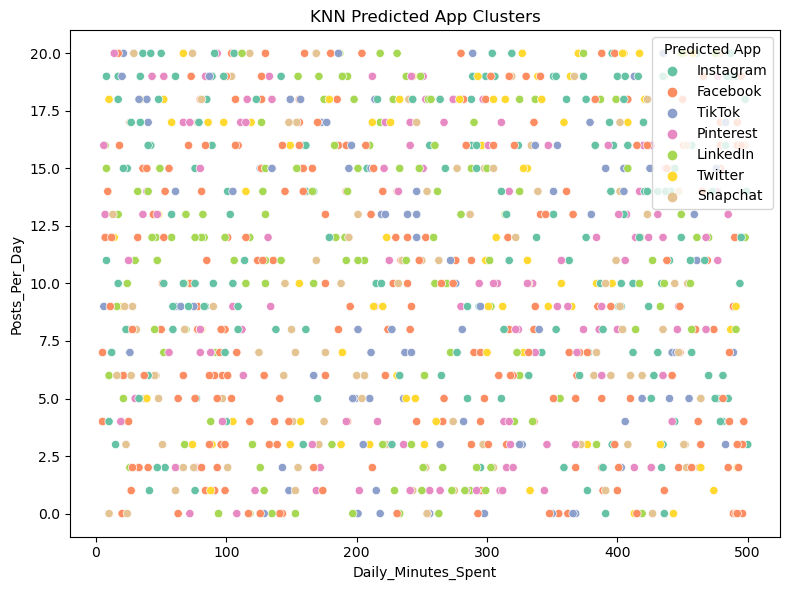

In [9]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
folder = "unzipped_archive_4"
filename = "social_media_usage.csv"
file_path = os.path.join(folder, filename)

if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    
    # Drop missing values if any
    df = df.dropna()

    # Define features and target
    features = ['Daily_Minutes_Spent', 'Posts_Per_Day', 'Likes_Per_Day', 'Follows_Per_Day']
    X = df[features]
    y = df['App']  # Target variable for classification

    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Train KNN classifier
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = knn.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    # Visualization: Plot predicted apps based on first 2 features
    col1, col2 = features[0], features[1]
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X[col1], y=X[col2], hue=knn.predict(X_scaled), palette='Set2')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title("KNN Predicted App Clusters")
    plt.legend(title='Predicted App')
    plt.tight_layout()
    plt.show()

else:
    print(f"File not found: {file_path}")


In [40]:
print(df.columns.tolist())


['Student_ID', 'Age', 'Gender', 'Academic_Level', 'Country', 'Avg_Daily_Usage_Hours', 'Most_Used_Platform', 'Affects_Academic_Performance', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Relationship_Status', 'Conflicts_Over_Social_Media', 'Addicted_Score']


C:\Users\malyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\malyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\malyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\malyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

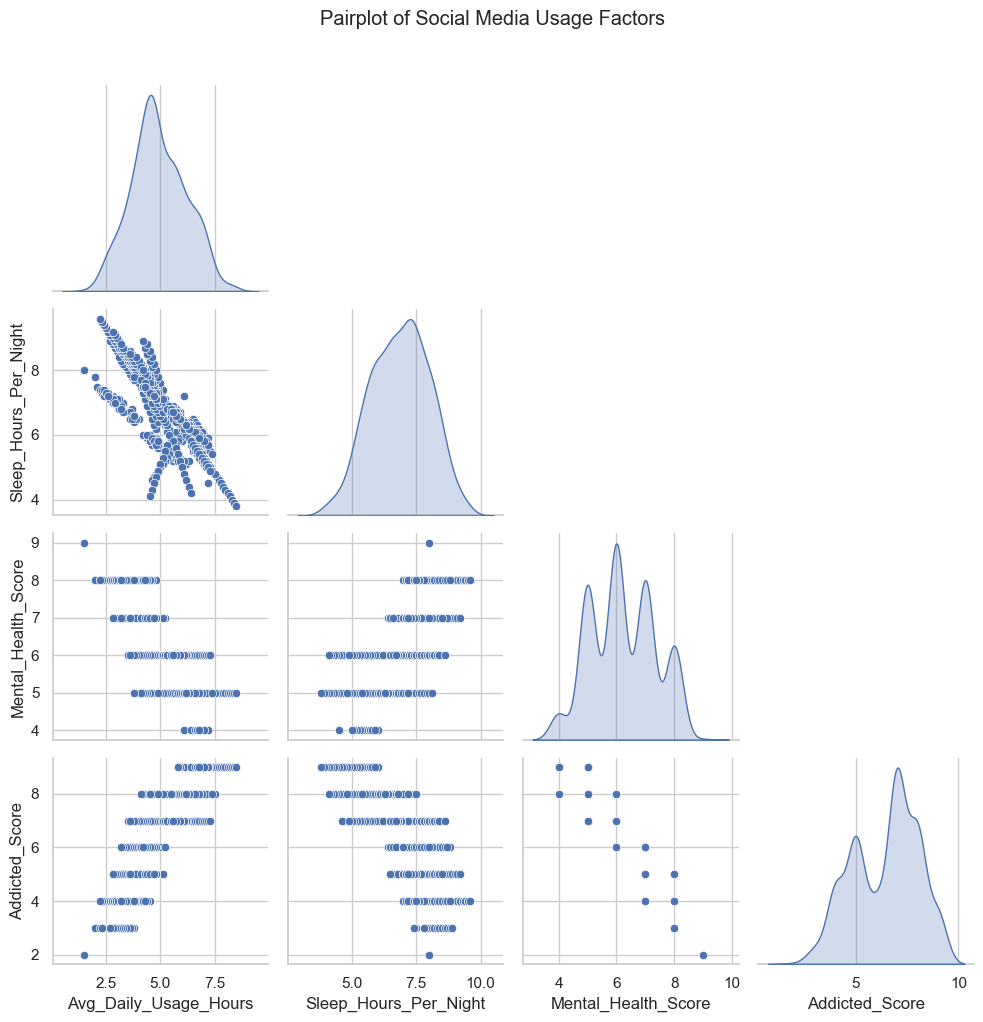

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define numeric columns to include
numeric_cols = ['Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Addicted_Score']

# Create the pairplot
sns.pairplot(df[numeric_cols], diag_kind='kde', corner=True)

plt.suptitle("Pairplot of Social Media Usage Factors", y=1.02)
plt.tight_layout()
plt.show()


In [58]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Create binary target variable (e.g., > 180 minutes = heavy user)
df['heavy_user'] = (df['daily_minutes_spent'] > 180).astype(int)

# Features and target
X = df[numerical_cols.columns.drop('daily_minutes_spent', errors='ignore')]
y = df['heavy_user']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print("📋 Classification Report:")
print(classification_report(y_test, y_pred))
print("🔍 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


📋 Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.12      0.20       107
           1       0.66      0.94      0.77       193

    accuracy                           0.65       300
   macro avg       0.59      0.53      0.49       300
weighted avg       0.61      0.65      0.57       300

🔍 Confusion Matrix:
[[ 13  94]
 [ 12 181]]
